## Imports

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# dataset source: https://www.kaggle.com/datasets/snehaanbhawal/resume-dataset
filePath = "../datasets/Resume/Resume.csv"

df = pd.read_csv(filePath, index_col=False)
print("DF Shape (Rows,Columns)=", df.shape)

DF Shape (Rows,Columns)= (2484, 4)


In [22]:
documentsList = df['Resume_str']

In [23]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 
# Apply fit_transform to document: csr_mat
# Transforms doc into a work frequency array (csr,matrix)
csr_mat = tfidf.fit_transform(documentsList)
# Print result of toarray() method
print(csr_mat.toarray())
# Get the words: words
words = tfidf.get_feature_names_out()
# Print words
print(words)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.03646868 0.         0.         ... 0.         0.         0.        ]]
['00' '000' '0001' ... 'òwaterfalló' 'últimos' 'ﬁlm']


In [24]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=24)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)

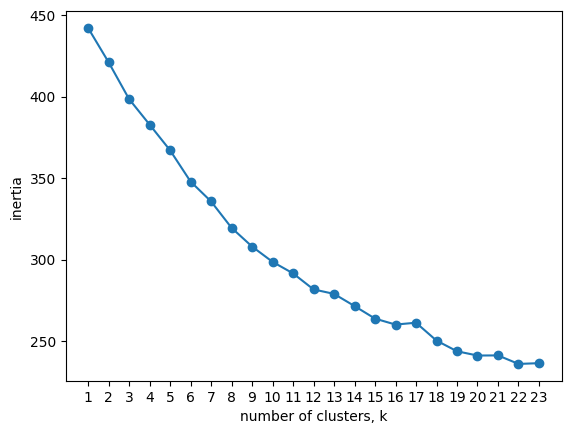

In [34]:
ks = range(1, 24)
inertias = []
for k in ks:
    # Create a TruncatedSVD instance: svd
    svd = TruncatedSVD(n_components=50)

    # Create a KMeans instance: kmeans
    kmeans = KMeans(n_clusters=k)

    # Create a pipeline: pipeline
    pipeline = make_pipeline(svd,kmeans)

    # Fit the pipeline to articles
    pipeline.fit(csr_mat)

    # Calculate the cluster labels: labels
    labels = pipeline.predict(csr_mat)
    
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [26]:
# Fit the pipeline to articles
pipeline.fit(csr_mat)

# Calculate the cluster labels: labels
labels = pipeline.predict(csr_mat)

# Create a DataFrame aligning labels and categories: df1
df1 = pd.DataFrame({'label': labels, 'Category': df['Category']})

# Display df sorted by cluster label
print(df1.sort_values('label'))


      label                Category
274       0  INFORMATION-TECHNOLOGY
219       0  INFORMATION-TECHNOLOGY
1296      0           DIGITAL-MEDIA
279       0  INFORMATION-TECHNOLOGY
1114      0              CONSULTANT
...     ...                     ...
820      23                 FITNESS
819      23                 FITNESS
818      23                 FITNESS
838      23                 FITNESS
846      23                 FITNESS

[2484 rows x 2 columns]
